# Combinations
Data: from 2015-01-01 to 2025-03-25 (current day) 

**Baseline**: S&P500 **Annual Return**: 11.04% 

**Try**: window_size = 280, rebalance_period = 1, max_selected_stocks = 100 **Results**: 17.86%

**Try**: window_size = 260, rebalance_period = 1, max_selected_stocks = 100 **Results**: 18.36%

**Try**: window_size = 240, rebalance_period = 1, max_selected_stocks = 100 **Results**: 18.69%

**Try**: window_size = 220, rebalance_period = 1, max_selected_stocks = 100 **Results**: 18.72%

**Try**: window_size = 200, rebalance_period = 1, max_selected_stocks = 100 **Results**: 20.64%

**Try**: window_size = 190, rebalance_period = 1, max_selected_stocks = 100 **Results**: 20.60%

**Try**: window_size = 180, rebalance_period = 1, max_selected_stocks = 100 **Results**: 20.91%

**Try**: window_size = 179, rebalance_period = 1, max_selected_stocks = 100 **Results**: 21.17%

**Try**: window_size = 178, rebalance_period = 1, max_selected_stocks = 100 **Results**: 20.60%

**Try**: window_size = 177, rebalance_period = 1, max_selected_stocks = 100 **Results**: 21.55%

**Try**: window_size = 176, rebalance_period = 1, max_selected_stocks = 100 **Results**: 21.53%

**Try**: window_size = 175, rebalance_period = 1, max_selected_stocks = 100 **Results**: 22.34%

**Try**: window_size = 174, rebalance_period = 1, max_selected_stocks = 100 **Results**: 22.71%

**Try**: window_size = 173, rebalance_period = 1, max_selected_stocks = 100 **Results**: 22.50%

**Try**: window_size = 172, rebalance_period = 1, max_selected_stocks = 100 **Results**: 22.52%

**Try**: window_size = 171, rebalance_period = 1, max_selected_stocks = 100 **Results**: 22.65%

****
**Try**: window_size = 170, rebalance_period = 1, max_selected_stocks = 100 **Results**: 23.11%

**Try**: window_size = 170, rebalance_period = 2, max_selected_stocks = 100 **Results**: 11.65%

**Try**: window_size = 170, rebalance_period = 3, max_selected_stocks = 100 **Results**: 7.49%

**Try**: window_size = 170, rebalance_period = 4, max_selected_stocks = 100 **Results**: 5.45%

**Try**: window_size = 170, rebalance_period = 5, max_selected_stocks = 100 **Results**: 4.34% 

**Try**: window_size = 170, rebalance_period = 6, max_selected_stocks = 100 **Results**: 3.71%

**Try**: window_size = 170, rebalance_period = 7, max_selected_stocks = 100 **Results**: 2.96%
****

**Try**: window_size = 166, rebalance_period = 1, max_selected_stocks = 100 **Results**: 22.29%

**Try**: window_size = 165, rebalance_period = 1, max_selected_stocks = 100 **Results**: 22.52%

**Try**: window_size = 160, rebalance_period = 1, max_selected_stocks = 100 **Results**: 22.96%

**Try**: window_size = 150, rebalance_period = 1, max_selected_stocks = 100 **Results**: 20.39%

**Try**: window_size = 140, rebalance_period = 1, max_selected_stocks = 100 **Results**: 17.69%

**Try**: window_size = 120, rebalance_period = 1, max_selected_stocks = 100 **Results**: 17.46%  

**Try**: window_size = 100, rebalance_period = 1, max_selected_stocks = 100 **Results**: 16.23%

**Try**: window_size = 80, rebalance_period = 1, max_selected_stocks = 100 **Results**: 12.33%

**Try**: window_size = 60, rebalance_period = 1, max_selected_stocks = 100 **Results**: 12.68%

**Try**: window_size = 40, rebalance_period = 1, max_selected_stocks = 100 **Results**: 10.92%

**Try**: window_size = 20, rebalance_period = 1, max_selected_stocks = 100 **Results**: 10.66%

# Now what showed under is data from 2005-2025 (till March 25th)

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Set the directory and initial capital
directory = "SP500_15_25"
initial_capital = 10000
min_data_length = 2500  # At least 2500 rows of data
window_size = 165 # Number of days to use for calculating MVO
rebalance_period = 1  # Rebalance the portfolio every 1 day
max_selected_stocks = 100  # Maximum number of stocks to hold
risk_free_rate = 0 # Here it doesn't really affect the portfolio rate, just the Sharpe Ratio would be overestimated

print("✅ Initialization complete!")


✅ Initialization complete!


In [2]:
def load_data(directory):
    stock_data = {}
    for ticker in os.listdir(directory):
        if ticker.endswith(".csv"):
            file_path = os.path.join(directory, ticker)
            df = pd.read_csv(file_path)
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
            df.sort_index(inplace=True)

            # Only select stocks with enough data (>= min_data_length)
            if df.shape[0] >= min_data_length:
                # Store both Open and Close prices for each stock
                stock_data[ticker.replace(".csv", "")] = df[['Close']]
    
    return stock_data

# Load the stock data
stock_data = load_data(directory)

# Preview the data of the first 5 stocks
for ticker in list(stock_data.keys())[:5]:
    print(f"📈 Sample data for {ticker}:\n", stock_data[ticker].head())

print(f"\n✅ Successfully loaded data for {len(stock_data)} stocks!")


📈 Sample data for TMUS:
                 Close
Date                 
2015-01-02  26.696949
2015-01-05  26.335123
2015-01-06  26.276451
2015-01-07  27.625967
2015-01-08  28.378956
📈 Sample data for CHRW:
                 Close
Date                 
2015-01-02  57.503933
2015-01-05  54.980743
2015-01-06  54.264282
2015-01-07  54.287663
2015-01-08  56.725151
📈 Sample data for COO:
                 Close
Date                 
2015-01-02  40.064987
2015-01-05  39.755657
2015-01-06  39.194370
2015-01-07  40.466599
2015-01-08  40.631241
📈 Sample data for ES:
                 Close
Date                 
2015-01-02  38.175926
2015-01-05  37.834938
2015-01-06  37.856258
2015-01-07  38.410351
2015-01-08  38.474285
📈 Sample data for HSIC:
                 Close
Date                 
2015-01-02  53.662746
2015-01-05  53.180393
2015-01-06  52.870586
2015-01-07  54.333332
2015-01-08  55.098038

✅ Successfully loaded data for 469 stocks!


In [3]:
# Initialize an empty list to store returns for each stock
returns_list = []

for ticker in stock_data:
    # Get the daily returns for 'Close' prices
    stock_returns = stock_data[ticker].pct_change().dropna()
    
    # Add the 'Close' returns to the list
    returns_list.append(stock_returns['Close'])

# Concatenate all the returns DataFrames along columns (axis=1)
returns = pd.concat(returns_list, axis=1)

# Set column names as stock tickers
returns.columns = stock_data.keys()

# Preview the data
print("📊 Example of returns data (first 5 rows):\n", returns.head())

print("\n✅ Daily returns calculation completed!")


📊 Example of returns data (first 5 rows):
                 TMUS      CHRW       COO        ES      HSIC      MKTX  \
Date                                                                     
2015-01-05 -0.013553 -0.043879 -0.007721 -0.008932 -0.008989 -0.019332   
2015-01-06 -0.002228 -0.013031 -0.014118  0.000564 -0.005826 -0.019278   
2015-01-07  0.051358  0.000431  0.032459  0.014637  0.027667  0.009016   
2015-01-08  0.027257  0.044899  0.004069  0.001665  0.014074  0.050241   
2015-01-09  0.007926 -0.010708 -0.006262 -0.012555  0.005053 -0.002650   

                 UDR        ED      MCHP       EOG  ...       EMN       KEY  \
Date                                                ...                       
2015-01-05  0.010520 -0.009496 -0.022287 -0.060278  ... -0.034519 -0.030303   
2015-01-06  0.005678  0.005631 -0.019375 -0.028495  ... -0.004198 -0.030506   
2015-01-07  0.006900  0.014830  0.005578 -0.006293  ... -0.006392  0.007675   
2015-01-08  0.001885  0.006263  0.031901  0

In [4]:
# Calculate annualized returns
def annualized_returns(returns, trading_days=252):
    return returns.mean() * trading_days

# Calculate the annualized covariance matrix
def annualized_covariance(returns, trading_days=252):
    return returns.cov() * trading_days

# Objective function: Maximize Sharpe Ratio
def objective(weights, mean_returns, cov_matrix, risk_free_rate = risk_free_rate):
    portfolio_return = np.sum(weights * mean_returns)
    
    # Calculate portfolio volatility (standard deviation)
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    
    # Handle negative or NaN variance (safety check)
    if portfolio_variance < 0 or np.isnan(portfolio_variance):
        portfolio_volatility = 1e-6  # A small value to avoid sqrt calculation error
    else:
        portfolio_volatility = np.sqrt(portfolio_variance)

    # Calculate the Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    return -sharpe_ratio  # Since `minimize` function in next block for perform optimization is minimizing, here we return the negative of the Sharpe Ratio

print("✅ MVO related functions have been defined!")


✅ MVO related functions have been defined!


In [5]:
# Initialize
portfolio_value = initial_capital
portfolio_values = []
weights_history = []

rebalance_dates = []  # Store the dates of each rebalance

for i in range(window_size, len(returns), rebalance_period):
    # Record the rebalance date (use i-1, as it refers to the data from the previous day)
    rebalance_dates.append(returns.index[i - 1])  

    # Get window data
    window_returns = returns.iloc[i - window_size:i]

    # Calculate annualized returns and standard deviation
    mean_returns = annualized_returns(window_returns)
    std_returns = window_returns.std() * np.sqrt(252)  # Annualized standard deviation

    # Calculate Sharpe Ratio and select the top max_selected_stocks stocks
    sharpe_ratios = mean_returns / std_returns
    top_stocks = sharpe_ratios.nlargest(max_selected_stocks).index  # Select the top max_selected_stocks stocks

    # Perform MVO only for selected stocks
    selected_returns = window_returns[top_stocks]
    mean_returns = mean_returns[top_stocks]
    cov_matrix = annualized_covariance(selected_returns)

    # Add a regularization term to prevent singular covariance matrix
    cov_matrix += np.eye(len(mean_returns)) * 1e-6  

    # Initialize weights
    num_assets = len(mean_returns)
    initial_weights = np.ones(num_assets) / num_assets

    # Constraints: Weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

    # Bounds for weights (0 ~ 1)
    bounds = tuple((0, 1) for _ in range(num_assets))

    # Perform optimization
    optimized_result = minimize(objective, initial_weights, args=(mean_returns, cov_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints)

    # Get optimal weights
    optimal_weights = optimized_result.x
    weights_history.append(pd.Series(optimal_weights, index=top_stocks, name=returns.index[i - 1]))

    # Calculate portfolio return (based on actual returns for the next period)
    recent_returns = returns.iloc[i:i + rebalance_period][top_stocks].mean()
    portfolio_return = np.sum(optimal_weights * recent_returns)
    portfolio_value *= (1 + portfolio_return)
    portfolio_values.append(portfolio_value)


# Link portfolio values with dates
portfolio_results = pd.DataFrame({'Date': rebalance_dates, 'Portfolio Value': portfolio_values})

# Record portfolio weights
weights_df = pd.DataFrame(weights_history)

print("✅ MVO Calculation Complete, Dates and Weights Recorded!")

# Print Results
print(portfolio_results.head())
print(weights_df.head())


✅ MVO Calculation Complete, Dates and Weights Recorded!
        Date  Portfolio Value
0 2015-08-31      9650.266065
1 2015-09-01      9786.614461
2 2015-09-02      9770.500018
3 2015-09-03      9661.973258
4 2015-09-04      9884.352963
                 CZR      DXCM      NFLX      HOLX      TMUS      AMZN  \
2015-08-31  0.175710  0.167117  0.068584  0.076015  0.075019  0.085942   
2015-09-01  0.180415  0.096409  0.068944  0.049112  0.127258  0.102764   
2015-09-02  0.184926  0.103599  0.058058  0.057452  0.110284  0.113319   
2015-09-03  0.179481  0.093824  0.046528  0.067007  0.090302  0.107302   
2015-09-04  0.194480  0.105331  0.049497  0.086150  0.086597  0.118048   

                     STZ           VMC           GPN      EPAM  ...  WSM  \
2015-08-31  8.496654e-15  5.902307e-15  4.441213e-15  0.056027  ...  NaN   
2015-09-01  6.186779e-03  5.463015e-15  3.630850e-15  0.058462  ...  NaN   
2015-09-02  7.824246e-15  7.064412e-15  5.132323e-15  0.040095  ...  NaN   
2015-09-03  8.4

In [6]:
# Generate DataFrame for weights and portfolio values
weights_df = pd.DataFrame(weights_history)
portfolio_values_df = pd.DataFrame(portfolio_values, columns=['Portfolio Value'], index=weights_df.index)

# Save results
weights_df.to_csv("optimal_weights_history.csv")
portfolio_values_df.to_csv("portfolio_value_history.csv")

print("✅ Results have been saved!")


✅ Results have been saved!


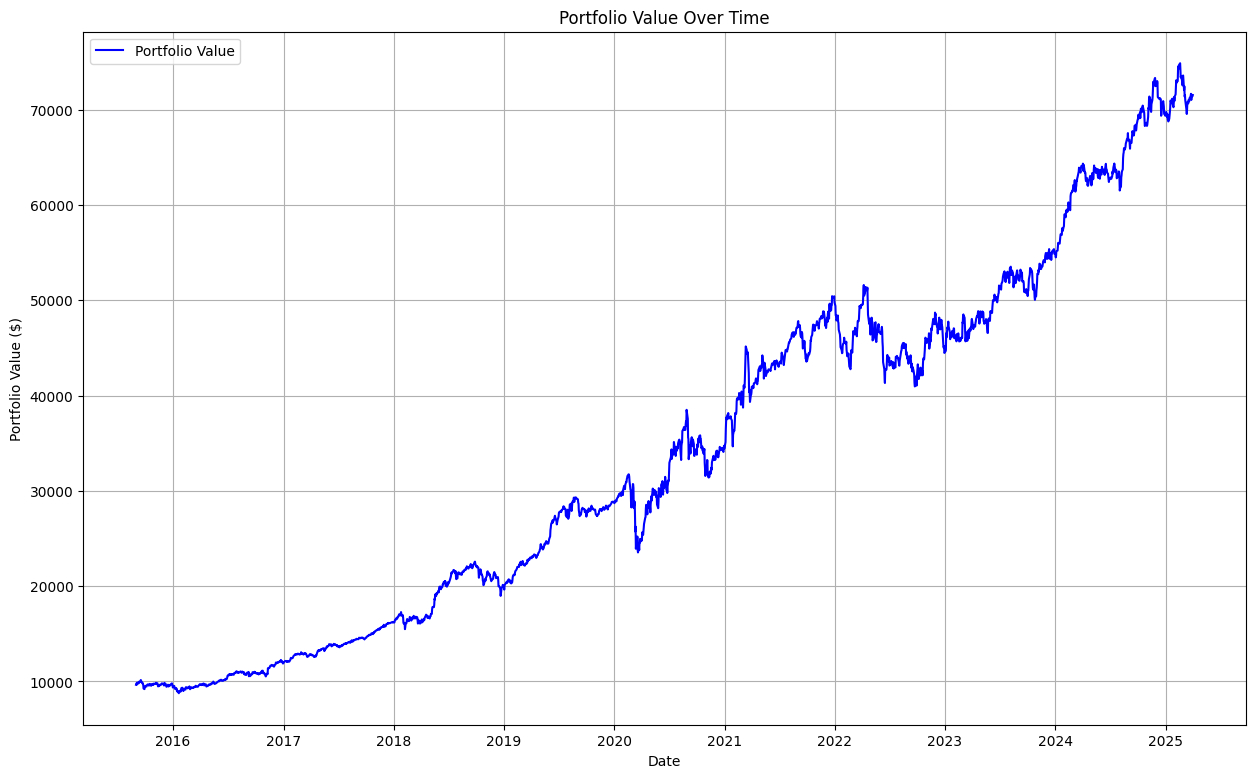

✅ Graph Finished


In [7]:
# Create MVO Portfolio Returns
plt.figure(figsize=(15, 9))
plt.plot(portfolio_values_df.index, portfolio_values_df['Portfolio Value'], label='Portfolio Value', color='b')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

print("✅ Graph Finished")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


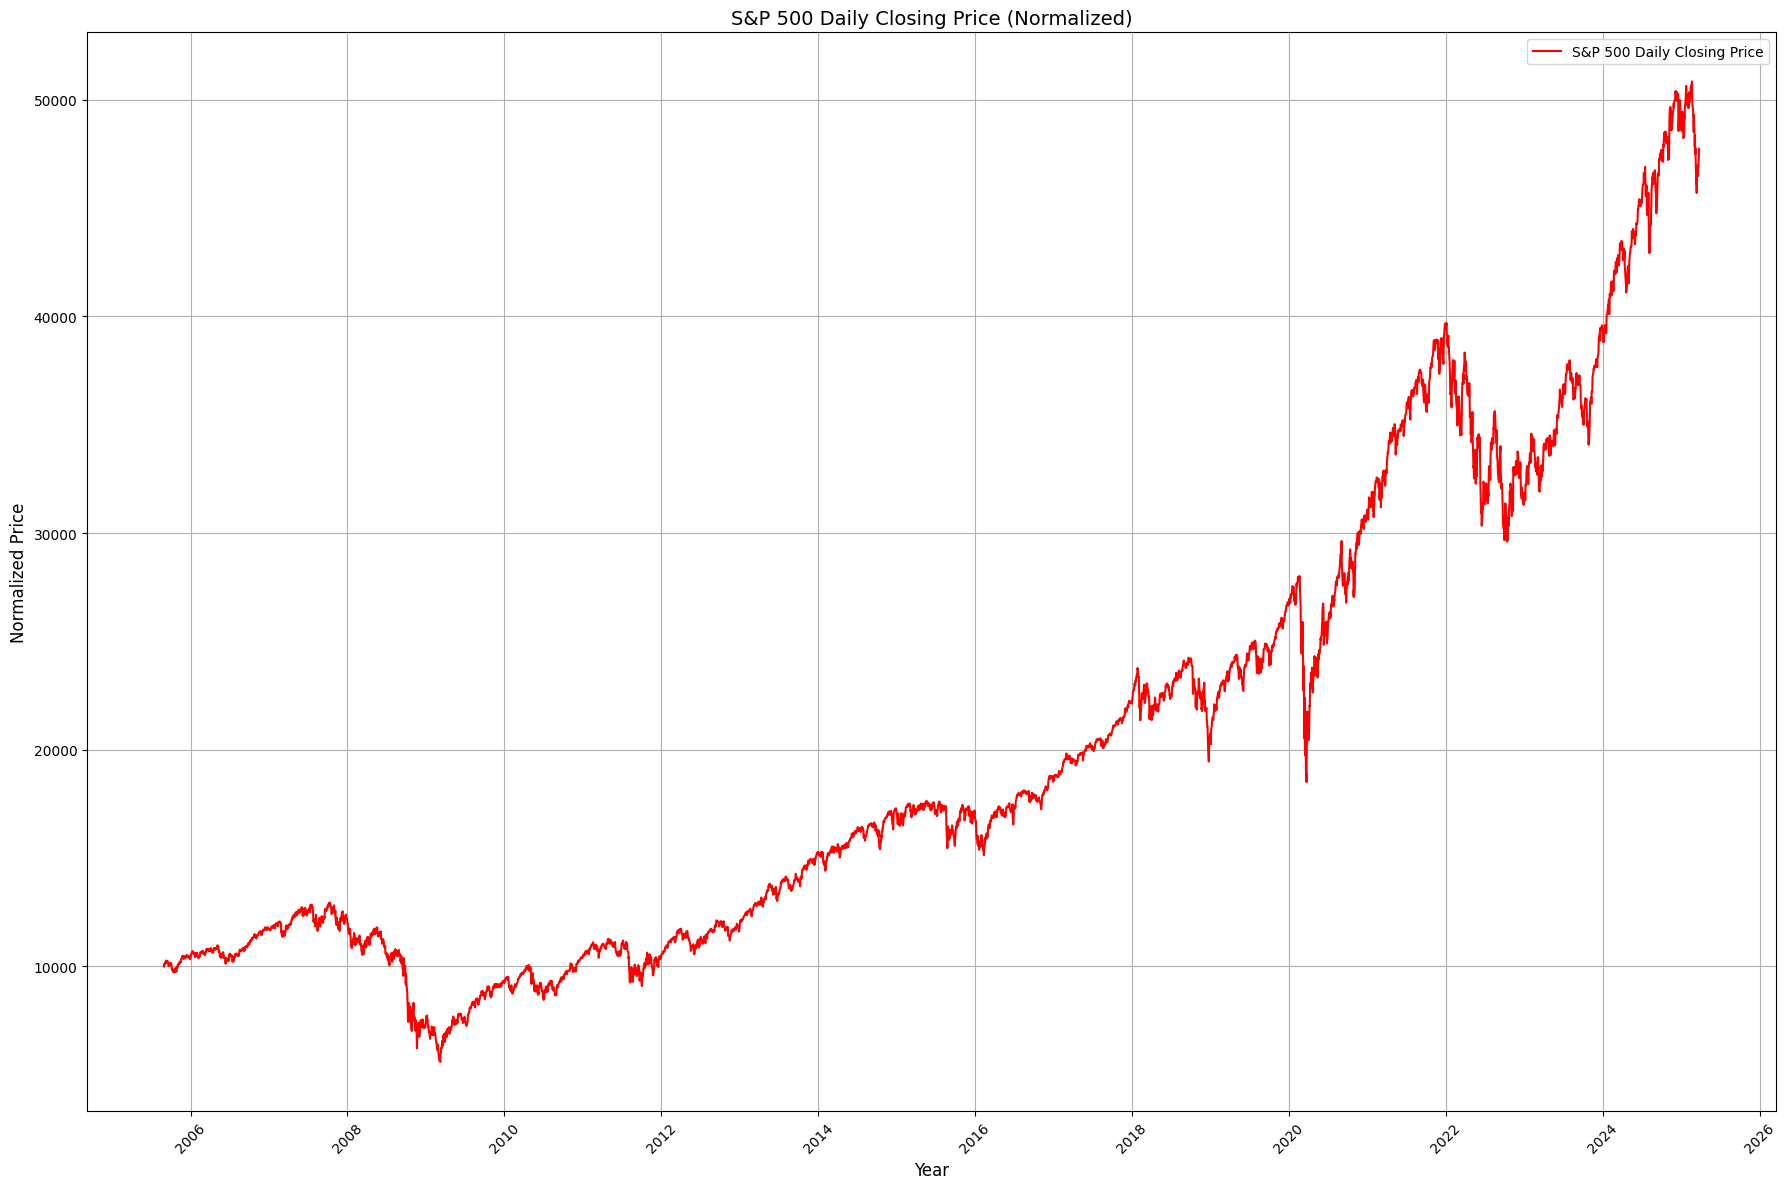

In [8]:
import matplotlib.dates as mdates
import yfinance as yf

# Download S&P 500 daily closing price data
data = yf.download('^GSPC', start='2005-08-30', end='2025-03-25')

# Get closing prices
close_prices = data['Close']

# Normalize closing prices: set the starting point to 10,000
normalized_close = 10000 * (close_prices / close_prices.iloc[0])

# Create chart
plt.figure(figsize=(18, 12))
plt.plot(close_prices.index, normalized_close, label='S&P 500 Daily Closing Price', color='r')

# Set x-axis to years
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.title('S&P 500 Daily Closing Price (Normalized)', fontsize=14)

# Format x-axis: display a tick every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # One tick every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Display only the year

# Beautify the plot
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate ticks to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
